<br>

# Técnicas Matemáticas para Big Data - Project 2
<br><br>


GROUP NN:
- Diogo Marto - Nº 108298 - ??% Work Participation
- Student 2 - Nº xxxxx - ??% Work Participation
- Student 3 - Nº xxxxx - ??% Work Participation

<br><br>

## 1. Introduction to the problem of study [1,0 valor]

<br><br>
## 2. Brief and general description of the approach and methods used [1,5 valor]

<br><br>
## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]

<br><br>
## 4. About the main method/algorithm used [1,5 valor]

<br><br>

## 5. Python imports and global configurations [0,5 valor]

### Install and import the necessary libraries to compute the Bayesian Network and perform other methods  

In [351]:
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib
# %pip install numpy
# %pip install pomegranate
# %pip install torch
# %pip install Pillow

<br><br>

## 6. Dataset and variables explanation [1,5 valor]

<br><br>

## 7. Main code as possible solution to the problem [1,5 valor] 

In [352]:
# open kc_house_data.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('kc_house_data.csv')
# Drop id column , waterfront , view , condition
df = df.drop('id', axis=1)	
df = df.drop('waterfront', axis=1)
df = df.drop('view', axis=1)
df = df.drop('condition', axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [353]:
# remove nulls
df = df.dropna()

# remove outliers based of price based on quantiles
df = df[(df['price'] > df['price'].quantile(0.01)) & (df['price'] < df['price'].quantile(0.99))]
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [354]:
# convert date to unix time
df['date'] = pd.to_datetime(df['date'])
df['date'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
# number of distinct dates
df['date'].nunique() 

372

In [355]:
# create intervals of dates based on 3 days
interval_name = "2days"
df[interval_name] = df['date'] // (2*24*60*60)
df[interval_name] = df[interval_name] - min(df[interval_name])
# number of distinct weeks
df[interval_name].nunique()
# remove last week
df = df[df[interval_name] < df[interval_name].nunique()]
df.sort_values(interval_name)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,2days
172,1398988800,313000.0,3,1.50,1340,7912,1.5,7,1340,0,1955,0,98133,47.7658,-122.339,1480,7940,0
5956,1398988800,285000.0,4,2.50,2200,9397,2.0,8,2200,0,1987,0,98001,47.3406,-122.269,2310,9176,0
20602,1398988800,555000.0,4,2.50,3310,6500,2.0,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,0
15556,1398988800,439950.0,3,2.50,1770,2875,2.0,8,1770,0,1990,0,98116,47.5631,-122.397,1770,3833,0
11891,1398988800,625000.0,4,2.50,2820,8408,2.0,9,2820,0,2014,0,98155,47.7538,-122.325,1300,8408,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,1431475200,170000.0,3,1.00,970,8710,1.0,6,970,0,1962,0,98198,47.4167,-122.302,1280,11805,188
20472,1431561600,479349.0,5,3.00,3223,6371,2.0,9,3223,0,2014,0,98042,47.3584,-122.163,1979,9008,188
16996,1431475200,645000.0,3,2.00,1640,4218,1.0,7,910,730,1941,0,98103,47.6546,-122.344,1670,4000,188
3770,1431475200,415000.0,3,2.25,1640,5880,1.0,7,1240,400,1977,0,98106,47.5323,-122.351,1200,4760,188


123 0 0
     2days  strength     mean_price class_price class_strength
0        1        88  561389.693182           6         Normal
1        2       172  529411.273256           4           High
2        3       158  514617.297468           3           High
3        4         7  516478.571429           3            Low
4        5       161  601501.906832           6           High
..     ...       ...            ...         ...            ...
183    184       178  508941.084270           3           High
184    185       127  517556.196850           3         Normal
185    186         5  600300.000000           6            Low
186    187        85  508660.411765           3         Normal
187    188        41  498735.097561           2            Low

[188 rows x 5 columns]


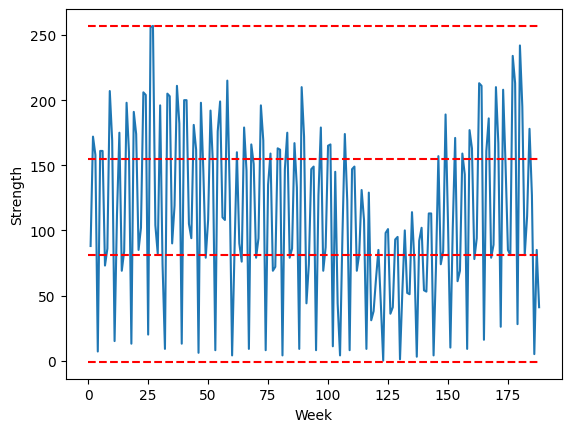

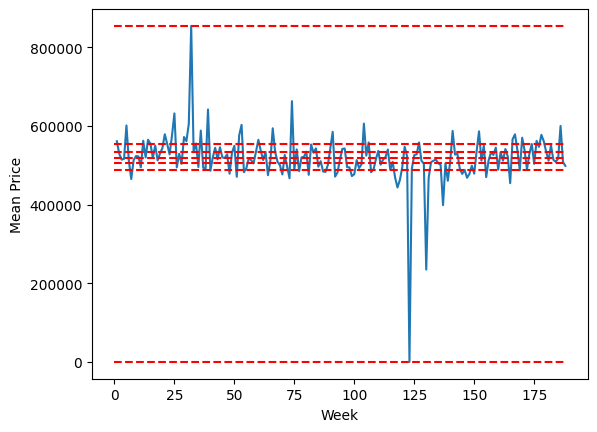

In [356]:
market_strength_classes = {
    "Low": 1/3,
    "Normal": 2/3,
    "High": 1
}

N = 6
mean_price_classes = {
    i: i / (N)
    for i in range(1,N+1)
}

def market_strength(df_previous,df_current):
    mean_price = df_current['price'].mean()
    mean_price_previous = df_previous['price'].mean()
    diff = mean_price - mean_price_previous

    # number of sales
    number = df_current['price'].count()
    return number

# calculate market strength for each week
r = []
for i in range(1,df[interval_name].nunique()):
    df_previous = df[df[interval_name] == i-1]
    df_current = df[df[interval_name] == i]
    s = market_strength(df_previous,df_current)
    mean = df_current['price'].mean()
    # if mean nan then 0
    mean = mean if not np.isnan(mean) else 0
    if mean == 0 or i == 123:
        print(i,s,mean)
    r.append((i,s,mean))

df2 = pd.DataFrame(r, columns=[interval_name,'strength',"mean_price"])
# map market mean price to classes based on quantiles
quantiles_price = [-1]+list(df2["mean_price"].quantile(list(mean_price_classes.values())))
df2["class_price"] = pd.cut(df2["mean_price"], quantiles_price, labels=list(mean_price_classes.keys()))

# map market strength to classes based on quantiles
quantiles_strength = [-1]+list(df2["strength"].quantile(list(market_strength_classes.values())))
df2["class_strength"] = pd.cut(df2["strength"], quantiles_strength, labels=list(market_strength_classes.keys()))

print(df2)

# plot
sns.lineplot(x=interval_name, y='strength', data=df2)
plt.hlines(quantiles_strength, 0, max(df2[interval_name]), colors='r', linestyles='dashed')
plt.ylim(None, None)
plt.xlabel('Week')
plt.ylabel('Strength')
plt.show()

# plot
sns.lineplot(x=interval_name, y='mean_price', data=df2)
plt.hlines(quantiles_price, 0, max(df2[interval_name]), colors='r', linestyles='dashed')
plt.ylim(None, None)
plt.xlabel('Week')
plt.ylabel('Mean Price')
plt.show()

In [357]:
from hmmlearn import hmm

states = tuple(df2["class_strength"].unique())
observations = tuple(df2["class_price"].unique().sort_values())

print("States:",states)
print("Observations:",observations)

# count percentages of each state
start_probs = df2["class_strength"].value_counts(normalize=True).to_dict()
print("Start probabilities:",start_probs)

convert_strength_to_index = dict((v,k) for k,v in enumerate(states))
emission_probs = np.zeros((len(states),len(observations)))
for i in range(len(df2)):
    p = df2["class_price"][i] - 1
    c = convert_strength_to_index[df2["class_strength"][i]]
    emission_probs[c][p] += 1
emission_probs = emission_probs / emission_probs.sum(axis=1, keepdims=True)

# parameterize the so that it accounts the previous K interval 
def model_for_with_k_parent(k, df2):
    p = []
    for i in range(k+1,df2[interval_name].nunique()):
        df2_previous = convert_strength_to_index[list(df2[df2[interval_name] == i-k]["class_strength"])[0]]
        df2_current = convert_strength_to_index[list(df2[df2[interval_name] == i]["class_strength"])[0]]
        p.append((df2_previous,df2_current))
    
    transition_probs = np.zeros((len(states),len(states)))
    for i in p:
        transition_probs[i[0]][i[1]] += 1
    transition_probs = transition_probs / transition_probs.sum(axis=1, keepdims=True)

    model = hmm.CategoricalHMM(n_components=len(states))
    model.startprob_ = np.array(list(start_probs.values()))
    model.transmat_ = transition_probs
    model.emissionprob_ = emission_probs
    return model , start_probs , transition_probs , emission_probs

model , start_probs, transition_probs , emission_probs = model_for_with_k_parent(1, df2)
print("Transition probabilities:\n",transition_probs)
print("Emission probabilities:\n",emission_probs)

States: ('Normal', 'High', 'Low')
Observations: (1, 2, 3, 4, 5, 6)
Start probabilities: {'Low': 0.3351063829787234, 'High': 0.3351063829787234, 'Normal': 0.32978723404255317}
Transition probabilities:
 [[0.2295082  0.37704918 0.39344262]
 [0.26984127 0.34920635 0.38095238]
 [0.48387097 0.29032258 0.22580645]]
Emission probabilities:
 [[0.14516129 0.20967742 0.17741935 0.11290323 0.20967742 0.14516129]
 [0.0952381  0.15873016 0.19047619 0.23809524 0.19047619 0.12698413]
 [0.26984127 0.12698413 0.12698413 0.14285714 0.0952381  0.23809524]]


In [358]:
p1 = np.exp(model.score(np.array([[0]])))
p2 = np.exp(model.score(np.array([[1]])))
p3 = np.exp(model.score(np.array([[2]])))
p4 = np.exp(model.score(np.array([[0,0,0]])))
print(p1,p2,p3,p4)

0.16954957457702827 0.16533347495941866 0.16516188950986477 0.004725490500449563


In [359]:
logprob, seq = model.decode(np.array([[3,4,5]]).transpose())
print(np.exp(logprob))
print([states[i] for i in seq])

logprob, seq = model.decode(np.array([[0,1,2]]).transpose())
print(np.exp(logprob))
print([states[i] for i in seq])


0.00048136846929312197
['High', 'High', 'Low']
0.0006484285640551361
['Low', 'Normal', 'High']


In [360]:
class MultiModel:
    def __init__(self, num_models):
        self.num_models = num_models
        self.k_ = [model_for_with_k_parent(i, df2) for i in range(num_models)]
        self.models_ = [i[0] for i in self.k_]
        self.start_probs_ = [i[1] for i in self.k_]
        self.transition_probs_ = [i[2] for i in self.k_]
        self.emission_probs_ = [i[3] for i in self.k_]

    def score(self, x):
        return [model.score(x) for model in self.models_]

    def decode(self, x):
        r =  [model.decode(x) for model in self.models_]
        return [i[0] for i in r], [i[1] for i in r]
    
    def decode_last(self, x):
        r =  [model.decode(x) for model in self.models_]
        # take majority vote
        votes = [i[1][-1] for i in r]
        return max(set(votes), key=votes.count)

model = MultiModel(3)

print(np.exp(model.score(np.array([[3,4,5]]).transpose())))

logprob, seq = model.decode(np.array([[3,4,5]]).transpose())

print()
print(np.exp(logprob))
print([[states[j] for j in i] for i in seq])

res = model.decode_last(np.array([[3,4,5]]).transpose())
print()
print(states[res])

[0.00414973 0.00465228 0.00463648]

[0.00192985 0.00048137 0.00058711]
[['High', 'High', 'High'], ['High', 'High', 'Low'], ['Low', 'High', 'Low']]

Low


<br><br>

## 8. Analysis of Example 1 [3,0 valor]

<br><br>

## 9. Analysis of Example 2 [3,0 valor]

<br><br>
## 10. Pros and cons of the approach [2,0 valor]

<br><br>
## 11. Future improvements [2,0 valor]


<br>
<div style="text-align: center;">
    <br><br>
    <p style="font-size: 40px;">References [1,0 valor]</p>
</div>
<br>
